In [2]:
from google.colab import drive
drive.mount ('/content/drive')
             

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive

/content/drive


In [4]:
cd My\ Drive


/content/drive/My Drive


In [5]:
cd Colab\ Notebooks


/content/drive/My Drive/Colab Notebooks


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import preprocessing

In [7]:
transaction_train = pd.read_csv('train_transaction.csv',  index_col='TransactionID')
identity_train = pd.read_csv('train_identity.csv', index_col='TransactionID')
# transaction_test = pd.read_csv('./ieee-fraud-detection/test_transaction.csv', index_col='TransactionID')
# identity_test = pd.read_csv('./ieee-fraud-detection/test_identity.csv', index_col='TransactionID')
print('done')

done


In [0]:
#picking fields used for training
#chosen_fields = ['D1','D2','D3','D4','D5','D6','M1','M9','V12','V13','id_20','card2','D15','TransactionAmt','M5','D6']


chosen_fields = ['TransactionAmt','addr1','addr2','card2','card3','card4','card5','card6',
                'D1','D2','D3','D4','D5','D6','D9','D10','D11','D12','D13','D14','D15','dist1','dist2',
                'id_01','id_02','id_05','id_12','id_13','id_14','id_18','id_19','id_20','id_30','id_33',
                'M7','M9','P_emaildomain','R_emaildomain',
                'M3','M4','M5','M6','M8',
                'V12','V13','V19','V20','V38','V45','V53','V54','V55','V61','V75','V76','V82',
                'V283','V284','V291','V304','V305','V306','V307','V308','V310','V312','V313','V315',
                'C1','C2','C5','C6','C8','C9','C10','C11','C12','C14']

In [9]:
#merging Data
train =  pd.merge(transaction_train,identity_train, how= 'left', left_index=True, right_index=True)
# test =  pd.merge(transaction_train,identity_train, how= 'left', left_index=True, right_index=True)

print('merged')

merged


In [0]:
#dropping target
y_train = train['isFraud'].copy()
X_train = train.drop('isFraud', axis = 1)

In [11]:
X_train

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987005,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987006,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987007,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987008,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device


In [0]:
#fill na's
X_train = X_train.fillna(0)

In [13]:
X_train

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,86400,68.500,W,13926,0.0,150.0,discover,142.0,credit,315.0,87.0,19.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,13.0,0.0,0.0,0.0,0.0,0.000000,0.000000,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2987001,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,0.0,0.0,gmail.com,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2987002,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,0.0,outlook.com,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,315.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2987003,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,0.0,0.0,yahoo.com,0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,0.0,0.0,0.000000,0.000000,84.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2987004,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,0.0,0.0,gmail.com,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,NotFound,0.0,-480.0,New,NotFound,166.0,0.0,542.0,144.0,0.0,0.0,0,0.0,0.0,0.0,0,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987005,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,0.0,gmail.com,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2987006,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,0.0,yahoo.com,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2987007,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,0.0,0.0,mail.com,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0
2987008,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,0.0,0.0,anonymous.com,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,-5.0,98945.0,0.0,0.0,0.0,-5.0,0.0,0.0,0.0,0.0,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,0.0,621.0,500.0,0.0,0.0,0,0.0,0.0,0.0,0,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device


In [0]:
columns = X_train.columns

In [0]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

print('Removed indexes:', id_rus)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Removed indexes: [363400 324199 179002 ... 590368 590372 590526]


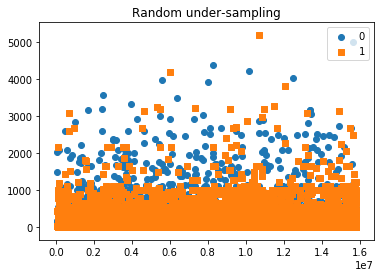

In [17]:
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [0]:
df = pd.DataFrame(X_rus, columns = columns)

In [19]:
df

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,9031954,554,W,10616,583,150,visa,226,credit,299,87,1200,0,gmail.com,0,194,145,0,0,168,138,0,0,132,0,136,0,506,155,517,517,0,468,0,0,0,0,0,423,180,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8019305,57,W,17188,321,150,visa,226,debit,299,87,23,0,sbcglobal.net,0,2,2,0,0,0,2,0,0,2,0,1,0,49,2,466,466,1,466,7,0,0,0,0,170,466,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3901324,59,W,10616,583,150,visa,226,credit,325,87,4,0,gmail.com,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11205347,34,W,13626,484,150,mastercard,224,credit,476,87,0,0,yahoo.com,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12444209,29.5,W,12469,360,150,mastercard,126,debit,251,87,82,0,gmail.com,0,2,2,0,0,0,5,0,0,2,0,3,0,32,2,44,44,1,625,1,0,0,0,0,625,121,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,7093571,70.95,W,9884,105,150,visa,166,debit,264,87,17,0,gmail.com,0,1,2,0,0,0,2,0,0,2,0,1,0,2,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6129389,77,W,9500,321,150,visa,226,debit,433,87,3,0,0,0,2,2,0,0,0,1,0,0,1,0,2,0,2,2,0,0,0,0,0,0,0,0,0,50,50,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,10519871,47.95,W,1431,492,150,visa,226,debit,343,87,0,0,0,0,1,2,0,0,1,0,0,0,1,0,1,0,2,1,2,2,2,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1195146,108.5,W,5409,170,150,visa,226,credit,325,87,6,0,yahoo.com,0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,4215447,59,W,17399,111,150,mastercard,224,debit,204,87,0,0,gmail.com,0,1,4,0,0,0,1,0,0,1,0,1,0,3,1,28,28,25,27,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#label encoding
for f in df.columns:
    if df[f].dtype == 'object':
#         or X_test[f].dtype=='object':
        le = preprocessing.LabelEncoder()
        le.fit(list(df[f].values)+ list(df[f].values))
        df[f]=le.transform(list(df[f].values))
#         X_test[f]= le.transform(list(X_test[f].values))
        
print('done')

done


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y_rus, random_state=42)

In [22]:
print(X_train)

       TransactionDT  TransactionAmt  ProductCD  ...  id_38  DeviceType  DeviceInfo
15922             34            1691          1  ...      2           1         236
23309           6355            2840          4  ...      0           0           0
18025          14113            3609          4  ...      0           0           0
20395          29693            1903          4  ...      0           0           0
35957          30432            2493          4  ...      0           0           0
2626           25970            2679          4  ...      0           0           0
3910            4286            2489          0  ...      2           2         612
9550           28147             802          4  ...      0           0           0
18002          40754            1901          4  ...      0           0           0
14445          38880            1143          0  ...      1           2           0
5345           13934             911          4  ...      0           0     

In [0]:
X_train = X_train[chosen_fields]
X_test = X_test[chosen_fields]

In [0]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(y_train)
one_hot_y_test = to_categorical(y_test)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=78))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 474       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 488
Trainable params: 488
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Fit the model to the training data
model.fit(
    X_train,
    one_hot_y,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
30994/30994 - 1s - loss: 9.2210 - acc: 0.6000
Epoch 2/100
30994/30994 - 1s - loss: 0.6639 - acc: 0.6220
Epoch 3/100
30994/30994 - 1s - loss: 0.6534 - acc: 0.6295
Epoch 4/100
30994/30994 - 1s - loss: 0.6309 - acc: 0.6505
Epoch 5/100
30994/30994 - 1s - loss: 0.5893 - acc: 0.6757
Epoch 6/100
30994/30994 - 1s - loss: 0.5726 - acc: 0.7158
Epoch 7/100
30994/30994 - 1s - loss: 0.5621 - acc: 0.7190
Epoch 8/100
30994/30994 - 1s - loss: 0.5515 - acc: 0.7305
Epoch 9/100
30994/30994 - 1s - loss: 0.5442 - acc: 0.7349
Epoch 10/100
30994/30994 - 1s - loss: 0.5361 - acc: 0.7388
Epoch 11/100
30994/30994 - 1s - loss: 0.5354 - acc: 0.7394
Epoch 12/100
30994/30994 - 1s - loss: 0.5322 - acc: 0.7393
Epoch 13/100
30994/30994 - 1s - loss: 0.5269 - acc: 0.7436
Epoch 14/100
30994/30994 - 1s - loss: 0.5267 - acc: 0.7440
Epoch 15/100
30994/30994 - 1s - loss: 0.5230 - acc: 0.7424
Epoch 16/100
30994/30994 - 1s - loss: 0.5210 - acc: 0.7455
Epoch 17/100
30994/30994 - 1s - loss: 0.5210 - acc: 0.7464
Epoch 

In [0]:
 encoded_predictions = model.predict_classes(X_test)
prediction_labels = le.inverse_transform(encoded_predictions)

In [0]:
to_list = list(encoded_predictions)

In [31]:
to_list.count(0)

5760

In [32]:
to_list.count(1)

4572

In [33]:
print(f"Predicted classes: {to_list}")
print(f"Actual Labels: {list(y_test)}")

Predicted classes: [1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,

In [0]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=78))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [35]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 474       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 530
Trainable params: 530
Non-trainable params: 0
_________________________________________________________________


In [37]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Fit the model to the training data
deep_model.fit(
    X_train,
    one_hot_y,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
30994/30994 - 1s - loss: 10.6922 - acc: 0.6291
Epoch 2/100
30994/30994 - 1s - loss: 1.4672 - acc: 0.6681
Epoch 3/100
30994/30994 - 1s - loss: 0.8993 - acc: 0.6865
Epoch 4/100
30994/30994 - 1s - loss: 0.7229 - acc: 0.6939
Epoch 5/100
30994/30994 - 1s - loss: 0.7478 - acc: 0.6989
Epoch 6/100
30994/30994 - 1s - loss: 0.6704 - acc: 0.7038
Epoch 7/100
30994/30994 - 1s - loss: 0.6745 - acc: 0.7044
Epoch 8/100
30994/30994 - 1s - loss: 0.6067 - acc: 0.7122
Epoch 9/100
30994/30994 - 1s - loss: 0.6243 - acc: 0.7108
Epoch 10/100
30994/30994 - 1s - loss: 0.6189 - acc: 0.7059
Epoch 11/100
30994/30994 - 1s - loss: 0.5980 - acc: 0.7108
Epoch 12/100
30994/30994 - 1s - loss: 0.5834 - acc: 0.7166
Epoch 13/100
30994/30994 - 1s - loss: 0.5796 - acc: 0.7121
Epoch 14/100
30994/30994 - 1s - loss: 0.5711 - acc: 0.7189
Epoch 15/100
30994/30994 - 1s - loss: 0.5628 - acc: 0.7198
Epoch 16/100
30994/30994 - 1s - loss: 0.5618 - acc: 0.7214
Epoch 17/100
30994/30994 - 1s - loss: 0.5523 - acc: 0.7267
Epoch

In [40]:
model_loss, model_accuracy = model.evaluate(
    X_test, one_hot_y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

10332/10332 - 0s - loss: 0.4937 - acc: 0.7654
Normal Neural Network - Loss: 0.49366586435870335, Accuracy: 0.765389084815979


In [41]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test, one_hot_y_test, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

10332/10332 - 0s - loss: 0.4694 - acc: 0.7809
Deep Neural Network - Loss: 0.46937680515585783, Accuracy: 0.7808749675750732


In [0]:
deeper_model = Sequential()
deeper_model.add(Dense(units=6, activation='relu', input_dim=78))
deeper_model.add(Dense(units=6, activation='relu'))
deeper_model.add(Dense(units=6, activation='relu'))
deeper_model.add(Dense(units=2, activation='softmax'))

In [43]:
deeper_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 474       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 14        
Total params: 572
Trainable params: 572
Non-trainable params: 0
_________________________________________________________________


In [44]:
deeper_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Fit the model to the training data
deeper_model.fit(
    X_train,
    one_hot_y,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
30994/30994 - 1s - loss: 6.0938 - acc: 0.5547
Epoch 2/100
30994/30994 - 1s - loss: 0.7138 - acc: 0.6132
Epoch 3/100
30994/30994 - 1s - loss: 0.6485 - acc: 0.6332
Epoch 4/100
30994/30994 - 1s - loss: 0.6307 - acc: 0.6601
Epoch 5/100
30994/30994 - 1s - loss: 0.6166 - acc: 0.6849
Epoch 6/100
30994/30994 - 1s - loss: 0.5990 - acc: 0.7034
Epoch 7/100
30994/30994 - 1s - loss: 0.5817 - acc: 0.7147
Epoch 8/100
30994/30994 - 1s - loss: 0.5687 - acc: 0.7210
Epoch 9/100
30994/30994 - 1s - loss: 0.5602 - acc: 0.7237
Epoch 10/100
30994/30994 - 1s - loss: 0.5544 - acc: 0.7277
Epoch 11/100
30994/30994 - 1s - loss: 0.5486 - acc: 0.7291
Epoch 12/100
30994/30994 - 1s - loss: 0.5457 - acc: 0.7316
Epoch 13/100
30994/30994 - 1s - loss: 0.5413 - acc: 0.7348
Epoch 14/100
30994/30994 - 1s - loss: 0.5373 - acc: 0.7363
Epoch 15/100
30994/30994 - 1s - loss: 0.5343 - acc: 0.7359
Epoch 16/100
30994/30994 - 1s - loss: 0.5325 - acc: 0.7379
Epoch 17/100
30994/30994 - 1s - loss: 0.5311 - acc: 0.7380
Epoch 

In [46]:
model_loss, model_accuracy = model.evaluate(
    X_test, one_hot_y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

10332/10332 - 0s - loss: 0.4937 - acc: 0.7654
Normal Neural Network - Loss: 0.49366586435870335, Accuracy: 0.765389084815979


In [47]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test, one_hot_y_test, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

10332/10332 - 0s - loss: 0.4694 - acc: 0.7809
Deep Neural Network - Loss: 0.46937680515585783, Accuracy: 0.7808749675750732


In [48]:
model_loss, model_accuracy = deeper_model.evaluate(
    X_test, one_hot_y_test, verbose=2)
print(f"Deeper Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

10332/10332 - 0s - loss: 0.4666 - acc: 0.7864
Deeper Neural Network - Loss: 0.4666475412391481, Accuracy: 0.7863917946815491
